# Titanic Challenge Enrico

Useful libraries import

In [911]:
import pandas as pd
import matplotlib as plt
import numpy as np
import sklearn as sl
import matplotlib.pyplot as plt

## Importing training set

In [912]:
training_set = pd.read_csv('/kaggle/input/titanic/train.csv')

In [913]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [914]:
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Importing testing set

In [915]:
testing_set = pd.read_csv('/kaggle/input/titanic/test.csv')

In [916]:
testing_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [917]:
testing_set.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Data selection

We assume that some of the columns are not useful to reach our goal. 
The first step is therefore selecting columns based on their (hypothetical) influence on avoiding passengers death. 

* **Pclass** (i.e. the third class was located in bow and stern: it is likely that passengers in these positions died in different proportions);
* **Sex** (it may seem a cognitive bias, but if we study the disposition of unmarried people we can see that they were located in different parts of the ship);
* **Age** (we can assume old people were most likely to die in an emergency situation: this is a weak hypothesis);
* **Parch** (to be parent of a child might have been a reason of having more chances to get on a lifeboat);
* **SibSp** (to be spoused or )
* **Survived** (if survived or not). 

In [918]:
clean_training_set = training_set[["Pclass", "Sex", "Age", "Parch", "SibSp", "Survived"]]

In [919]:
clean_training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   Parch     891 non-null    int64  
 4   SibSp     891 non-null    int64  
 5   Survived  891 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 41.9+ KB


## Generic correlation
The following graph shows correlations between columns

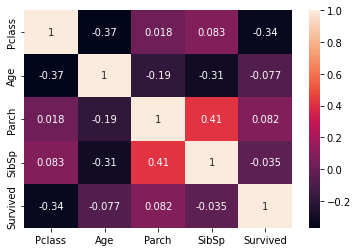

In [920]:
import seaborn as sns
ax = sns.heatmap(clean_training_set.corr(), annot=True)

### Relation between class and death
Passengers death seems to be highly correlated to their (travel) class: 

<AxesSubplot:title={'center':'Class and death relation'}, xlabel='travel class', ylabel='deaths'>

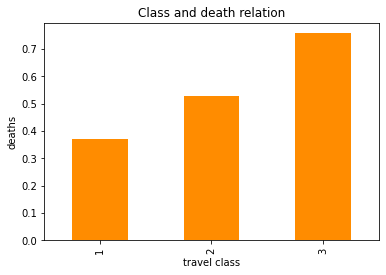

In [921]:
class_scheme = clean_training_set.groupby('Pclass')['Survived'].apply(lambda x: (x==0).mean())
class_scheme.plot(kind='bar', color='darkorange', width = 0.5, title='Class and death relation', ylabel='deaths', xlabel='travel class')

## Relation between sex and death
As we can see, males death rate is greater than females one. 

<AxesSubplot:title={'center':'Sex and death relation'}, xlabel='sex', ylabel='deaths'>

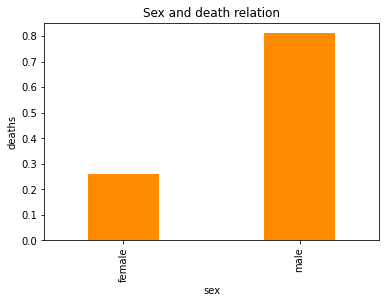

In [922]:
sex_scheme = clean_training_set.groupby('Sex')['Survived'].apply(lambda x: (x==0).mean())
sex_scheme.plot(kind='bar', color='darkorange', width = 0.4, title='Sex and death relation', ylabel='deaths', xlabel='sex')

## Relation between age and death
Children and elderlies on Titanic died less that middle age people (probably because they had priority on lifeboats): 

<AxesSubplot:title={'center':'Age and death relation'}, xlabel='age', ylabel='survived'>

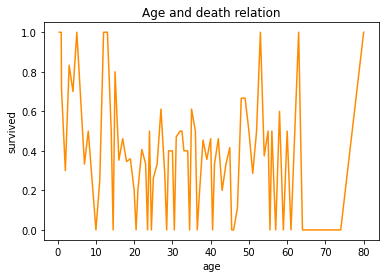

In [923]:
age_scheme = clean_training_set.groupby('Age')['Survived'].mean()
age_scheme.plot(kind='line', color='darkorange', title='Age and death relation', ylabel='survived', xlabel='age')

## Relation between SibSp and death
Death probability increases with increasing relationship

<AxesSubplot:title={'center':'SibSp and death relation'}, xlabel='SibSp', ylabel='deaths'>

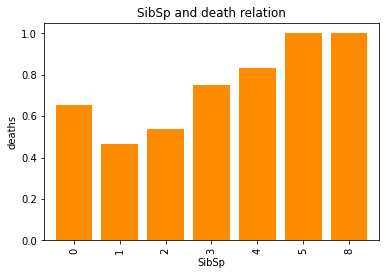

In [924]:
sibsp_scheme = clean_training_set.groupby('SibSp')['Survived'].apply(lambda x: (x==0).mean())
sibsp_scheme.plot(kind='bar', color='darkorange', width = 0.8, title='SibSp and death relation', ylabel='deaths', xlabel='SibSp')

## Relation between Parch and death

<AxesSubplot:title={'center':'SibSp and death relation'}, xlabel='Parch', ylabel='deaths'>

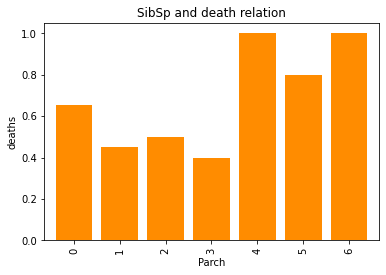

In [925]:
parch_scheme = clean_training_set.groupby('Parch')['Survived'].apply(lambda x: (x==0).mean())
parch_scheme.plot(kind='bar', color='darkorange', width = 0.8, title='SibSp and death relation', ylabel='deaths', xlabel='Parch')

# Training set normalization

## Training set traduction (strings to numbers)

Here we convert males to value 0 and females to value 1

In [926]:
df = clean_training_set[clean_training_set['Sex'].notnull()].copy()
df['Sex'] = df['Sex'].astype(str).copy()
df["Sex"]=df.Sex.map({"male":0,"female":1})

df

,Pclass,Sex,Age,Parch,SibSp,Survived
0,3,0,22.0,0,1,0
1,1,1,38.0,0,1,1
2,3,1,26.0,0,0,1
3,1,1,35.0,0,1,1
4,3,0,35.0,0,0,0
...,...,...,...,...,...,...
886,2,0,27.0,0,0,0
887,1,1,19.0,0,0,1
888,3,1,NaN,2,1,0
889,1,0,26.0,0,0,1


As we can see Age column has NaN values that have to be replaced with the medium value of age

In [927]:
check_nan = df['Age'].isnull().values.any()
print(check_nan)

True


In [928]:
mean_age = int(df['Age'].mean())
print("Mean age: " + str(mean_age))

Mean age: 29


In [929]:
df.loc[ pd.isna(df['Age']), 'Age'] = mean_age

In [930]:
check_nan = df['Age'].isnull().values.any()
print("Now we don't have NaN values anymore: " + str(check_nan))

Now we don't have NaN values anymore: False


In [931]:
df.isnull().sum()

Pclass      0
Sex         0
Age         0
Parch       0
SibSp       0
Survived    0
dtype: int64

In [932]:
df

,Pclass,Sex,Age,Parch,SibSp,Survived
0,3,0,22.0,0,1,0
1,1,1,38.0,0,1,1
2,3,1,26.0,0,0,1
3,1,1,35.0,0,1,1
4,3,0,35.0,0,0,0
...,...,...,...,...,...,...
886,2,0,27.0,0,0,0
887,1,1,19.0,0,0,1
888,3,1,29.0,2,1,0
889,1,0,26.0,0,0,1


## Now we're going to obtain a range of age to define better death probability

We split Age into three different columns as follows: 

In [933]:
child_list = df['Age'].apply(lambda x: 1 if x < 18 else 0)
df.insert(4, "Child", child_list, True)

adult_list = df['Age'].apply(lambda x: 1 if x >= 18 and x < 50 else 0)
df.insert(5, "Adult", adult_list, True)

elderly_list = df['Age'].apply(lambda x: 1 if x > 50 else 0)
df.insert(6, "Elderly", elderly_list, True)

df = df.drop(columns=['Age'], axis = 1)

## Grafici di Giulio: 

In [934]:
#children = df.groupby('Child').Survived.mean()
#adults = df.groupby('Adult').Survived.mean()
#elderlies = df.groupby('Elderly').Survived.mean()

#.plot(kind='bar', color='darkorange', width = 0.8, title='Children survived', ylabel='deaths', xlabel='Parch')

In [935]:
clean_training_set = df.copy()
clean_training_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Pclass    891 non-null    int64
 1   Sex       891 non-null    int64
 2   Parch     891 non-null    int64
 3   Child     891 non-null    int64
 4   Adult     891 non-null    int64
 5   Elderly   891 non-null    int64
 6   SibSp     891 non-null    int64
 7   Survived  891 non-null    int64
dtypes: int64(8)
memory usage: 62.6 KB


# Testing set normalization

In [936]:
clean_testing_set = testing_set[["Pclass", "Sex", "Age", "Parch", "SibSp"]]

In [937]:
df = clean_testing_set[clean_testing_set['Sex'].notnull()].copy()
df['Sex'] = df['Sex'].astype(str).copy()
df["Sex"]=df.Sex.map({"male":0,"female":1})

df

,Pclass,Sex,Age,Parch,SibSp
0,3,0,34.5,0,0
1,3,1,47.0,0,1
2,2,0,62.0,0,0
3,3,0,27.0,0,0
4,3,1,22.0,1,1
...,...,...,...,...,...
413,3,0,NaN,0,0
414,1,1,39.0,0,0
415,3,0,38.5,0,0
416,3,0,NaN,0,0


In [938]:
check_nan = df['Age'].isnull().values.any()
print(check_nan)

True


In [939]:
mean_age = int(df['Age'].mean())
print("Mean age: " + str(mean_age))

Mean age: 30


In [940]:
df.loc[ pd.isna(df['Age']), 'Age'] = mean_age

In [941]:
check_nan = df['Age'].isnull().values.any()
print("Now we don't have NaN values anymore: " + str(check_nan))

Now we don't have NaN values anymore: False


In [942]:
df.isnull().sum()

Pclass    0
Sex       0
Age       0
Parch     0
SibSp     0
dtype: int64

In [943]:
child_list = df['Age'].apply(lambda x: 1 if x < 18 else 0)
df.insert(4, "Child", child_list, True)

adult_list = df['Age'].apply(lambda x: 1 if x >= 18 and x < 50 else 0)
df.insert(5, "Adult", adult_list, True)

elderly_list = df['Age'].apply(lambda x: 1 if x > 50 else 0)
df.insert(6, "Elderly", elderly_list, True)

df = df.drop(columns=['Age'], axis = 1)

In [944]:
clean_testing_set = df.copy()
clean_testing_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Pclass   418 non-null    int64
 1   Sex      418 non-null    int64
 2   Parch    418 non-null    int64
 3   Child    418 non-null    int64
 4   Adult    418 non-null    int64
 5   Elderly  418 non-null    int64
 6   SibSp    418 non-null    int64
dtypes: int64(7)
memory usage: 26.1 KB


# Support Vector Classification algorithm

In [945]:
from sklearn.model_selection import train_test_split

# In a standart situation we would use these steps:
"""
X_train = clean_training_set[["Pclass", "Sex", "Child", "Adult", "Elderly", "Parch", "SibSp"]]

Y_train = clean_training_set['Survived']

"""
X_test = clean_testing_set[["Pclass", "Sex", "Child", "Adult", "Elderly", "Parch", "SibSp"]]


# But at the moment we want to check if our predictions are accurate or not,
# so we split the training set into two pieces so that we obtain a smaller training set
# and a testing set that provides a Survived column: 
# -----------------------------------------------------------------------------------------------
X = clean_training_set[["Pclass", "Sex", "Child", "Adult", "Elderly", "Parch", "SibSp"]]
Y = clean_training_set['Survived']
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [946]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 140 to 684
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Pclass   712 non-null    int64
 1   Sex      712 non-null    int64
 2   Child    712 non-null    int64
 3   Adult    712 non-null    int64
 4   Elderly  712 non-null    int64
 5   Parch    712 non-null    int64
 6   SibSp    712 non-null    int64
dtypes: int64(7)
memory usage: 44.5 KB


In [947]:
X_train.head()

,Pclass,Sex,Child,Adult,Elderly,Parch,SibSp
140,3,1,0,1,0,2,0
439,2,0,0,1,0,0,0
817,2,0,0,1,0,1,1
378,3,0,0,1,0,0,0
491,3,0,0,1,0,0,0


In [948]:
Y_train.head()

140    0
439    0
817    0
378    0
491    0
Name: Survived, dtype: int64

In [949]:
# Importing C-Support Vector Classification from scikit-learn
from sklearn.svm import SVC

# Declaring the SVC with no tunning
classifier = SVC(probability=True, random_state=100, gamma='scale')

# Fitting the data. This is where the SVM will learn
classifier.fit(X_train, Y_train)

# Predicting the result and giving the accuracy
SVC_score = classifier.score(x_test, y_test)

print(SVC_score)

0.8044692737430168


In [950]:
print('So the accuracy of the Support Vector Machines Classifier is',round(SVC_score*100,2))

So the accuracy of the Support Vector Machines Classifier is 80.45


In [951]:
predicted = classifier.predict(x_test)

from sklearn import metrics
print(
    f"Classification report for classifier {classifier}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(probability=True, random_state=100):
              precision    recall  f1-score   support

           0       0.82      0.87      0.85       110
           1       0.77      0.70      0.73        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179




In [952]:
prediction = classifier.predict(X_test)
prediction

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

# Multi-layer Perceptron classifier (MLP)

In [953]:
X = clean_training_set[["Pclass", "Sex", "Child", "Adult", "Elderly", "Parch", "SibSp"]]
Y = clean_training_set['Survived']
X = X.astype(float)
Y = Y.astype(float)

In [954]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
X, Y = make_classification(n_samples=100, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=1)

clf = MLPClassifier(solver='lbfgs', learning_rate='constant', activation='relu', random_state=1, max_iter=800).fit(X_train, y_train)
#clf.predict_proba(X_test[:1])
#clf.predict(X_test[:5, :])

MLP_score = clf.score(X_test, y_test)


In [955]:
print('So the accuracy of the Multi-layer Perceptron classifier is',round(MLP_score*100,2))

So the accuracy of the Multi-layer Perceptron classifier is 90.0


# MLP Regressor

In [956]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
X, Y = make_regression(n_samples=200, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y,random_state=1)
regr = MLPRegressor(random_state=1, max_iter=2000).fit(X_train, y_train)
#regr.predict(X_test[:2])

MLPRegressor_score = regr.score(X_test, y_test)

In [957]:
print('So the accuracy of the Multi-layer Perceptron Regressor is',round(MLPRegressor_score*100,2))

So the accuracy of the Multi-layer Perceptron Regressor is 52.09


# Stochastic Gradient Descent Classificator

In [958]:
X = clean_training_set[["Pclass", "Sex", "Child", "Adult", "Elderly", "Parch", "SibSp"]]
Y = clean_training_set['Survived']

In [959]:
"""
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
# Always scale the input. The most convenient way is to use a pipeline.
clf = make_pipeline(StandardScaler(),
                    SGDClassifier(max_iter=1000, tol=1e-3))
clf.fit(X, Y)

#print(clf.predict([[-0.8, -1]]))

SGDClassifier_score = clf.score(X_test, y_test)
"""

'\nfrom sklearn.linear_model import SGDClassifier\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.pipeline import make_pipeline\n# Always scale the input. The most convenient way is to use a pipeline.\nclf = make_pipeline(StandardScaler(),\n                    SGDClassifier(max_iter=1000, tol=1e-3))\nclf.fit(X, Y)\n\n#print(clf.predict([[-0.8, -1]]))\n\nSGDClassifier_score = clf.score(X_test, y_test)\n'

# Decision Tree Classifier

In [960]:
X = clean_training_set[["Pclass", "Sex", "Child", "Adult", "Elderly", "Parch", "SibSp"]]
Y = clean_training_set['Survived']
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [961]:
"""
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X.values, Y)

DecisionTreeClassifier_score = clf.score(X_test, y_test)
"""

'\nfrom sklearn import tree\nclf = tree.DecisionTreeClassifier()\nclf = clf.fit(X.values, Y)\n\nDecisionTreeClassifier_score = clf.score(X_test, y_test)\n'

In [962]:
#print('So the accuracy of the Decision Tree Classifier is',round(DecisionTreeClassifier_score*100,2))